In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
from IPython.core.pylabtools import figsize
figsize(14.5,10)

# the problem

log normal seems adequate

In [2]:
cov = [[1.0, 0.2, 0.3,],
       [0.2, 1.0, 0.3,],
       [0.3, 0.3, 1.0]]
cov = np.array(cov)

In [3]:
mu  = np.log([0.3, 0.4, 0.5])


In [4]:
rv = np.random.multivariate_normal(mu, cov, size=5)
log_rv= np.exp(rv)

In [5]:
log_rv

array([[ 0.34456982,  1.38267097,  1.04595444],
       [ 0.0917394 ,  0.51084997,  0.40555067],
       [ 0.23832652,  0.25387664,  0.14578191],
       [ 0.18287657,  0.18881772,  0.80504274],
       [ 0.03955732,  0.08757163,  0.13878268]])

In [6]:
log_rv[0,0]

0.34456981846934731

In [8]:
np.diag((3,3,3))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

In [9]:
np.zeros(shape=(2,))

array([ 0.,  0.])

In [10]:
a = normal_thompson()

In [11]:
a.update(1,1,log_rv[1,1])

In [12]:
a.update(1,1,log_rv[1,2])

In [13]:
a.update(1,1,log_rv[1,1])

In [14]:
a.update(1,1,log_rv[2,1])

In [15]:
a.reward

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.42028181,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [16]:
a.N

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [17]:
a.std

array([[ 10.        ,  10.        ,  10.        ,  10.        ,  10.        ],
       [ 10.        ,   0.42198486,  10.        ,  10.        ,  10.        ],
       [ 10.        ,  10.        ,  10.        ,  10.        ,  10.        ]])

In [18]:
a.choose_arm(1)

0

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


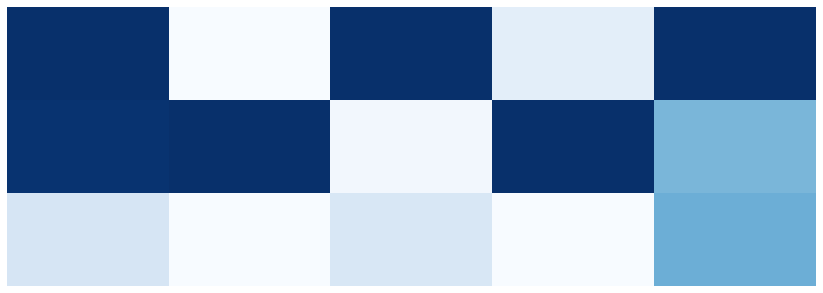

In [19]:
for i in range(1000):
    rv = np.random.multivariate_normal(mu, cov, size=5)
    log_rv= np.exp(rv)
    arm = np.random.randint(0,5)
    cont = np.random.randint(0,3)
    
    a.choose_arm(cont)
    reward = log_rv[arm,cont]
    a.update(cont,arm,reward)
    

figsize(14.5,5)
plt.pcolor(a.std/a.std.max(axis=0),cmap=plt.cm.Blues)
frame1 = plt.gca()

#plt.axis('off')
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
#figsize(14.5,10)
plt.savefig('whatever_christmas4.png', facecolor='white', edgecolor='k')


In [20]:
a.std.flatten()

array([  1.59880978e-03,   2.82216263e-04,   3.73331052e-03,
         2.11717749e-05,   2.58645579e-03,   9.15103745e-03,
         7.18017731e-02,   6.77608331e-04,   2.98500890e-02,
         2.41201128e-03,   9.27324130e-03,   2.62492837e-04,
         2.37251686e-02,   2.99850237e-03,   5.18596546e-03])

In [21]:
a.reward.T

array([[ 0.57783902,  0.73698325,  0.89980812],
       [ 0.48746602,  0.66456266,  0.82997314],
       [ 0.45631916,  0.58106112,  0.79064559],
       [ 0.35981879,  0.56777406,  0.69819661],
       [ 0.50732048,  0.63269321,  0.78759743]])

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


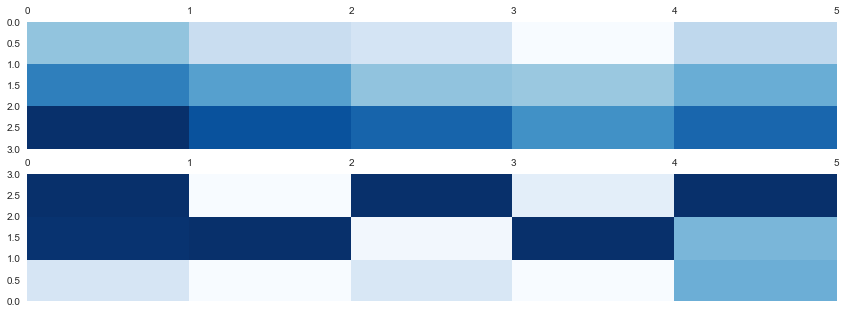

In [22]:
#fig, ax = plt.subplots()
ax = plt.subplot(2,1,1)
heatmap = plt.pcolor(a.reward,cmap=plt.cm.Blues)
ax.invert_yaxis()
ax.xaxis.tick_top()

fig =  plt.subplot(2,1,2)
heatmap = plt.pcolor(a.std/a.std.max(axis=0),cmap=plt.cm.Blues)
#fig.invert_yaxis()
fig.xaxis.tick_top()


In [23]:
ya = np.diag((1,2,1))
ya

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

In [24]:
np.linalg.inv(ya)

array([[ 1. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ],
       [ 0. ,  0. ,  1. ]])

# Linear

In [25]:
class linear_thompson(object):
    """ from: Thompson Sampling for Contextual Bandits with Linear Payoffs, Agrawal"""
    def __init__(self,mu= None,f = 0,d=3,nu_sq = 1000,num_arms = 3,len_cont = 2,simple=True):
        self.B = np.diag(np.ones(shape=(d+len_cont)))
        self.simple=simple
        if mu == None:
            self.mu = np.zeros(shape = (d+len_cont,))
        self.f =np.zeros(shape = (d+len_cont,))
        self.d = d
        self.nu_sq = nu_sq
        self.arms = [[0,1,0],[1,0,0],[0,0,1],[1,1,0],[0,2,4]]#dummies?
        self.num_arms = len(self.arms)
        
    def select_arm(self, context):
        """selects an arm depending on bayesian regression model.
        simple means sample five times from normal distribution with given m(x) and s(x);
        ~simple means draw weights from multivariate normal with mu and B and then multiply in weight. 
        Not sure if that's exactly the same thing."""
        if self.simple:
            samples = []

            for i in range(self.num_arms):
                compl_cont = self.arms[i]
                compl_cont = np.atleast_2d(compl_cont+context)
                mu_new = compl_cont.dot(self.mu)
                std_new = compl_cont.dot(self.nu_sq*np.linalg.inv(self.B)).dot(compl_cont.T)
                samples += [np.random.normal(mu_new,std_new)]
            return samples.index(max(samples))
    
        mu_t = np.random.multivariate_normal(self.mu,self.nu_sq*np.linalg.inv(self.B))
        samples = []
        for i in range(self.num_arms):
            compl_cont = self.arms[i]
            compl_cont = compl_cont + context
            #print(compl_cont)
            b_i = np.atleast_2d(compl_cont)
            samples += [b_i.dot(mu_t)]
            
        return samples.index(max(samples))
    
    def update(self,reward,arm,context):
        """updates bayesian regression model. Variance isn't optimal right now."""
        cont = np.array(self.arms[arm]+context)

        self.B = self.B + np.atleast_2d(cont).T.dot(np.atleast_2d(cont))
        self.f = self.f+ cont.T*reward
        self.mu = np.linalg.inv(self.B).dot(np.atleast_2d(self.f).T).T.flatten()
            
    
        

In [26]:
a = linear_thompson()
b = linear_thompson(simple=False)
np.linalg.inv(a.B).dot(a.f)

array([ 0.,  0.,  0.,  0.,  0.])

In [27]:
#a = linear_thompson()
a.mu,b.mu

(array([ 0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.]))

In [28]:
a.select_arm([1,1])

4

In [29]:
a.B,b.B

(array([[ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.]]), array([[ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1.]]))

In [30]:
np.linalg.inv(a.B)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [31]:
a.arms[1]

[1, 0, 0]

In [32]:
#a.update(10,2,[1,0])

In [33]:
a.mu

array([ 0.,  0.,  0.,  0.,  0.])

In [34]:
a.f

array([ 0.,  0.,  0.,  0.,  0.])

# testsuite

In [35]:
which = []
which_ = []
opt_arm = []
cont = [[0,1],[0,0],[1,0]]
num_rounds = 1000000
for i in range(num_rounds):
    j = np.random.randint(3)
    context = cont[j]
    #print(context)
    arm = a.select_arm(context)
    which += [arm]
    which_ += [j]
    if context == cont[0]:
        opt_arm +=[1]

        reward = 1
        if arm ==1:
            reward = 1.3
        if arm == 0:
            reward = 1.0
        if arm == 2:
            reward = 0.4
        if arm == 4:
            reward = 0
    if context == cont[1]:
        opt_arm +=[4]

        reward = .3
        if arm ==4:
            reward = 1.3
        if arm == 2:
            reward = 1.0
        if arm == 0:
            reward = 0
        if arm == 3:
            reward = .1
            
    if context == cont[2]:
        opt_arm +=[3]
        reward = .5
        if arm ==4:
            reward = .3
        if arm == 2:
            reward = .2
        if arm == 1:
            reward = 0
        if arm == 0:
            reward = 0
        if arm == 3:
            reward = .7
    a.update(reward,arm,context)
    

In [36]:
a.B

array([[  940358.,   901571.,        0.,   313391.,   313087.],
       [  901571.,  1125291.,   441120.,   337576.,   337360.],
       [       0.,   441120.,   883585.,    73377.,    73646.],
       [  313391.,   337576.,    73377.,   333549.,        0.],
       [  313087.,   337360.,    73646.,        0.,   333261.]])

In [37]:
np.bincount(which)

array([  3159,  38786,   1344, 901571,  55140], dtype=int64)

In [38]:
np.bincount(opt_arm)

array([     0, 333260,      0, 333548, 333192], dtype=int64)

In [39]:
(np.array(opt_arm) == np.array(which)).sum()/num_rounds

0.33202599999999999

In [40]:
1/5

0.2

Check for precisions!


# Theory
Bayesian Regression, then sample values at different X_i = context.append(Arm)

In [41]:
a.mu

array([ 0.11780635,  0.06480367, -0.00113095,  0.46992787,  0.78020257])